Notebook to explore the datasets and do some statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir

In C:\Users\sriku\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sriku\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sriku\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\sriku\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sriku\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

# First DataSet on DJIA

In [2]:
listdir("../")

['.gitignore',
 'Baselines',
 'Data Experiments',
 'Datasets',
 'Embeddings',
 'Logistic Regression',
 'LSTM',
 'Neural Network Keras',
 'q3v4DR.ipynb',
 'README.md',
 'SVM',
 'Time Series']

In [3]:
listdir("../Datasets")

['apple-microsoft', 'djia', 'yahoo-finance', 'yahoofinance']

## DJIA table

In [4]:
djia = pd.read_csv("../Datasets/djia/upload_DJIA_table.csv",parse_dates=[0],index_col=0).sort_index()
pd.concat((djia.head(3),djia.tail(2)))

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141


In [5]:
djia.isna().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [6]:
djia_full = djia.resample("d").asfreq()
print("Missing days: ",djia_full.Close.isna().sum())
print("Missing ratio: {:.1f}".format(100* djia_full.Close.isna().sum()/djia_full.shape[0]))
djia_full.info()

Missing days:  896
Missing ratio: 31.1
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2885 entries, 2008-08-08 to 2016-07-01
Freq: D
Data columns (total 6 columns):
Open         1989 non-null float64
High         1989 non-null float64
Low          1989 non-null float64
Close        1989 non-null float64
Volume       1989 non-null float64
Adj Close    1989 non-null float64
dtypes: float64(6)
memory usage: 157.8 KB


There are some missing dates here... $896$ days among the $2885$ days of data --> $31\%$ missing

## RedditNews

In [7]:
news = pd.read_csv("../Datasets/djia/RedditNews.csv",parse_dates=[0],index_col=0).sort_index()
news.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73608 entries, 2008-06-08 to 2016-07-01
Data columns (total 1 columns):
News    73608 non-null object
dtypes: object(1)
memory usage: 1.1+ MB


In [8]:
pd.concat((news.head(3),news.tail(2)))

,News
Date,
2008-06-08,"b'Marriage, they said, was reduced to the stat..."
2008-06-08,b'Nim Chimpsky: The tragedy of the chimp who t...
2008-06-08,"b""Canada: Beware slippery slope' to censorship..."
2016-07-01,Taiwanese warship accidentally fires missile t...
2016-07-01,A 117-year-old woman in Mexico City finally re...


In [9]:
dates,count = np.unique(news.index,return_counts=True)

In [10]:
print("Dates with different number of articles: ",(count != np.full(count.shape[0],count[0])).sum())
n,c = np.unique(count,return_counts=True)
pd.DataFrame((n,c),index=["Nb articles","Nb days"]).T.set_index("Nb articles")

Dates with different number of articles:  12


,Nb days
Nb articles,
22,1
23,5
24,4
25,2931
50,2


In [11]:
# Same dates proposed as original indexes ?
print("\tUnique dates:\nNews shape: ",np.unique(news.index).shape)
print("DJIA shape: ",np.unique(djia.index).shape)
print("DJIA resampled shape: ",np.unique(djia_full.index).shape)

	Unique dates:
News shape:  (2943,)
DJIA shape:  (1989,)
DJIA resampled shape:  (2885,)


In [12]:
nb = 0
for d in np.unique(news.index):
    if d not in djia_full.index:
        print(str(d).split('T')[0],end="  ;  ")
        nb+=1

exp = np.unique(news.index).shape[0]-np.unique(djia_full.index).shape[0]
print(f"Total of {nb} missing found. Expected {exp}")

2008-06-08  ;  2008-06-09  ;  2008-06-10  ;  2008-06-11  ;  2008-06-12  ;  2008-06-13  ;  2008-06-14  ;  2008-06-15  ;  2008-06-16  ;  2008-06-17  ;  2008-06-18  ;  2008-06-19  ;  2008-06-20  ;  2008-06-21  ;  2008-06-22  ;  2008-06-23  ;  2008-06-24  ;  2008-06-25  ;  2008-06-26  ;  2008-06-27  ;  2008-06-28  ;  2008-06-29  ;  2008-06-30  ;  2008-07-01  ;  2008-07-02  ;  2008-07-03  ;  2008-07-04  ;  2008-07-05  ;  2008-07-06  ;  2008-07-07  ;  2008-07-08  ;  2008-07-09  ;  2008-07-10  ;  2008-07-11  ;  2008-07-12  ;  2008-07-13  ;  2008-07-14  ;  2008-07-15  ;  2008-07-16  ;  2008-07-17  ;  2008-07-18  ;  2008-07-19  ;  2008-07-20  ;  2008-07-21  ;  2008-07-22  ;  2008-07-23  ;  2008-07-24  ;  2008-07-25  ;  2008-07-26  ;  2008-07-27  ;  2008-07-28  ;  2008-07-29  ;  2008-07-30  ;  2008-07-31  ;  2008-08-01  ;  2008-08-02  ;  2008-08-03  ;  2008-08-04  ;  2008-08-05  ;  2008-08-06  ;  2008-08-07  ;  Total of 61 missing found. Expected 58


In [13]:
nb = 0
for d in np.unique(djia_full.index):
    if d not in np.unique(news.index):
        print(str(d).split('T')[0],end="  ;  ")
        nb+=1

print(f"Total of {nb} missing found. Expected 3")

2009-03-29  ;  2010-03-28  ;  2016-03-27  ;  Total of 3 missing found. Expected 3


## Combined

In [14]:
comb = pd.read_csv("../Datasets/djia/Combined_News_DJIA.csv",parse_dates=[0],index_col=0)
comb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2008-08-08 to 2016-07-01
Data columns (total 26 columns):
Label    1989 non-null int64
Top1     1989 non-null object
Top2     1989 non-null object
Top3     1989 non-null object
Top4     1989 non-null object
Top5     1989 non-null object
Top6     1989 non-null object
Top7     1989 non-null object
Top8     1989 non-null object
Top9     1989 non-null object
Top10    1989 non-null object
Top11    1989 non-null object
Top12    1989 non-null object
Top13    1989 non-null object
Top14    1989 non-null object
Top15    1989 non-null object
Top16    1989 non-null object
Top17    1989 non-null object
Top18    1989 non-null object
Top19    1989 non-null object
Top20    1989 non-null object
Top21    1989 non-null object
Top22    1989 non-null object
Top23    1988 non-null object
Top24    1986 non-null object
Top25    1986 non-null object
dtypes: int64(1), object(25)
memory usage: 419.6+ KB


In [31]:
pd.concat((comb.head(1),comb.tail(1)))

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",Switzerland denies Muslim girls citizenship af...,...,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...


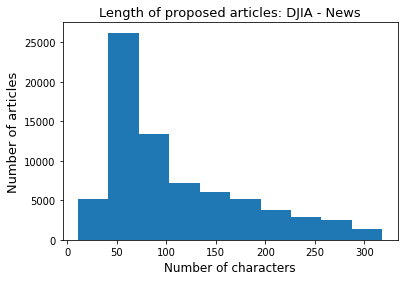

In [32]:
length = []
for article in news.News:
    try:
        length.append(len(article))
    except:
        pass


plt.hist(length)
plt.title("Length of proposed articles: DJIA - News",fontsize=13)
plt.xlabel("Number of characters",fontsize=12)
plt.ylabel("Number of articles",fontsize=13)
plt.show()

In [33]:
news.News[0],len(news.News[0])

("b'Marriage, they said, was reduced to the status of a commercial transaction in which women could be discarded by husbands claiming to have discovered hidden defects in them.'",
 175)

In [34]:
len(news)

73608

Points to discuss:
- the exercise can stay the same: look at up or down. No more.
- for a time series analysis, the full time series might be usefull, so row data must be extracted from Yahoo finances.
- First idea: compare the two approaches: on the one hand, the text analysis via a sentiment analysis. On the other hand, a time series analysis (ARIMA for sure, maybe NN too)
- Second idea: if a little time, can combine the results of sentiment analysis and a time series NN to try to go further...

Questions:
- what data are we using ? The opening, the closing ?

# Second DataSet Apple-Microsoft
## Apple
### Apple stock

In [35]:
apple_stock = pd.read_csv("../Datasets/apple-microsoft/AppleNewsStock.csv",parse_dates=[0],index_col=0)
apple_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-12-01 to 2016-11-30
Data columns (total 7 columns):
Open         2517 non-null float64
High         2517 non-null float64
Low          2517 non-null float64
Close        2517 non-null float64
Adj Close    2517 non-null float64
Volume       2517 non-null int64
News         2323 non-null object
dtypes: float64(5), int64(1), object(1)
memory usage: 157.3+ KB


In [36]:
pd.concat((apple_stock.head(3),apple_stock.tail(2)))

,Open,High,Low,Close,Adj Close,Volume,News
Date,,,,,,,
2006-12-01,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...
2006-12-04,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,More on Housing Prices : The broadest governme...
2006-12-05,13.092857,13.190000,12.981428,91.269997,13.038571,165709600,NaN
2016-11-29,110.779999,112.029999,110.070000,111.459999,111.459999,28528800,NaN
2016-11-30,111.599998,112.199997,110.269997,110.519997,110.519997,36162300,NaN


In [37]:
apple_stock_full = apple_stock.resample("d").asfreq()
print("Missing days: ",apple_stock_full.Close.isna().sum())
print("Missing ratio: {:.1f}\n".format(100* apple_stock_full.Close.isna().sum()/apple_stock_full.shape[0]))
apple_stock_full.info()

Missing days:  1136
Missing ratio: 31.1

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2006-12-01 to 2016-11-30
Freq: D
Data columns (total 7 columns):
Open         2517 non-null float64
High         2517 non-null float64
Low          2517 non-null float64
Close        2517 non-null float64
Adj Close    2517 non-null float64
Volume       2517 non-null float64
News         2323 non-null object
dtypes: float64(6), object(1)
memory usage: 228.3+ KB


### Apple Final Data

In [38]:
apple_final = pd.read_csv("../Datasets/apple-microsoft/AppleFinalData.csv",parse_dates=[0],index_col=0)
apple_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-12-01 to 2016-11-30
Data columns (total 9 columns):
Open         2517 non-null float64
High         2517 non-null float64
Low          2517 non-null float64
Close        2517 non-null float64
Adj Close    2517 non-null float64
compound     2517 non-null float64
neg          2517 non-null float64
neu          2517 non-null float64
pos          2517 non-null float64
dtypes: float64(9)
memory usage: 196.6 KB


In [39]:
pd.concat((apple_final.head(3),apple_final.tail(2)))

,Open,High,Low,Close,Adj Close,compound,neg,neu,pos
Date,,,,,,,,,
2006-12-01,13.1143,13.19,12.8714,91.32,13.0457,0.7707,0.032,0.905,0.063
2006-12-04,13.1257,13.15,12.9286,91.12,13.0171,0.8720,0.011,0.904,0.085
2006-12-05,13.0929,13.19,12.9814,91.27,13.0386,0.0000,0.000,0.000,0.000
2016-11-29,110.7800,112.03,110.0700,111.46,111.4600,0.0000,0.000,0.000,0.000
2016-11-30,111.6000,112.20,110.2700,110.52,110.5200,0.0000,0.000,0.000,0.000


In [40]:
apple_final_full = apple_final.resample("d").asfreq()
print("Missing days: ",apple_final_full.Close.isna().sum())
print("Missing ratio: {:.1f}\n".format(100* apple_final_full.Close.isna().sum()/apple_final_full.shape[0]))
apple_final_full.info()

Missing days:  1136
Missing ratio: 31.1

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2006-12-01 to 2016-11-30
Freq: D
Data columns (total 9 columns):
Open         2517 non-null float64
High         2517 non-null float64
Low          2517 non-null float64
Close        2517 non-null float64
Adj Close    2517 non-null float64
compound     2517 non-null float64
neg          2517 non-null float64
neu          2517 non-null float64
pos          2517 non-null float64
dtypes: float64(9)
memory usage: 285.4 KB


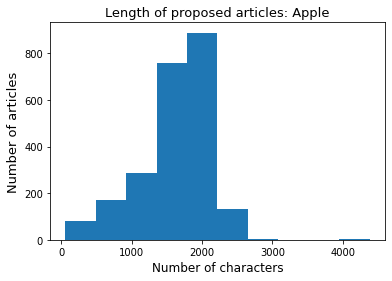

In [41]:
length = []
for article in apple_stock.News:
    try:
        length.append(len(article))
    except:
        pass


plt.hist(length)
plt.title("Length of proposed articles: Apple",fontsize=13)
plt.xlabel("Number of characters",fontsize=12)
plt.ylabel("Number of articles",fontsize=13)
plt.show()

## Microsoft

In [45]:
mic_stock = pd.read_csv("../Datasets/apple-microsoft/MicrosoftNewsStock.csv",parse_dates=[1],index_col=1)
#mic_stock = mic_stock.columns[1:]
mic_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-12-01 to 2016-11-30
Data columns (total 8 columns):
Unnamed: 0    2517 non-null int64
Open          2517 non-null float64
High          2517 non-null float64
Low           2517 non-null float64
Close         2517 non-null float64
Adj Close     2517 non-null float64
Volume        2517 non-null int64
News          1341 non-null object
dtypes: float64(5), int64(2), object(1)
memory usage: 177.0+ KB


In [46]:
pd.concat((mic_stock.head(3),mic_stock.tail(2)))

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,News
Date,,,,,,,,
2006-12-01,0,29.230000,29.299999,28.900000,29.120001,29.120001,72257000,NaN
2006-12-04,1,29.230000,29.520000,29.170000,29.330000,29.330000,55123400,The Retooling of a Search Engine : Ask.com is ...
2006-12-05,2,29.360001,29.400000,29.030001,29.129999,29.129999,45606000,NaN
2016-11-29,2515,60.650002,61.410000,60.520000,61.090000,61.090000,22366700,NaN
2016-11-30,2516,60.860001,61.180000,60.220001,60.259998,60.259998,34655400,NaN


In [47]:
mic_stock_full = mic_stock.resample("d").asfreq()
print("Missing days: ",mic_stock_full.Close.isna().sum())
print("Missing ratio: {:.1f}\n".format(100* mic_stock_full.Close.isna().sum()/mic_stock_full.shape[0]))
mic_stock_full.info()

Missing days:  1136
Missing ratio: 31.1

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2006-12-01 to 2016-11-30
Freq: D
Data columns (total 8 columns):
Unnamed: 0    2517 non-null float64
Open          2517 non-null float64
High          2517 non-null float64
Low           2517 non-null float64
Close         2517 non-null float64
Adj Close     2517 non-null float64
Volume        2517 non-null float64
News          1341 non-null object
dtypes: float64(7), object(1)
memory usage: 256.9+ KB


### Microsoft Final Data

In [48]:
mic_stock_final = pd.read_csv("../Datasets/apple-microsoft/MicrosoftFinalData.csv",parse_dates=[0],index_col=0)
mic_stock_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-12-01 to 2016-11-30
Data columns (total 9 columns):
Open         2517 non-null float64
High         2517 non-null float64
Low          2517 non-null float64
Close        2517 non-null float64
Adj Close    2517 non-null float64
compound     2517 non-null float64
neg          2517 non-null float64
neu          2517 non-null float64
pos          2517 non-null float64
dtypes: float64(9)
memory usage: 196.6 KB


In [49]:
pd.concat((mic_stock_final.head(3),mic_stock_final.tail(2)))

,Open,High,Low,Close,Adj Close,compound,neg,neu,pos
Date,,,,,,,,,
2006-12-01,29.23,29.30,28.90,29.12,29.12,0.0000,0.000,0.000,0.0
2006-12-04,29.23,29.52,29.17,29.33,29.33,-0.7783,0.137,0.863,0.0
2006-12-05,29.36,29.40,29.03,29.13,29.13,0.0000,0.000,0.000,0.0
2016-11-29,60.65,61.41,60.52,61.09,61.09,0.0000,0.000,0.000,0.0
2016-11-30,60.86,61.18,60.22,60.26,60.26,0.0000,0.000,0.000,0.0


In [50]:
mic_stock_full = mic_stock_full.resample("d").asfreq()
print("Missing days: ",mic_stock_full.Close.isna().sum())
print("Missing ratio: {:.1f}\n".format(100* mic_stock_full.Close.isna().sum()/mic_stock_full.shape[0]))
mic_stock_full.info()

Missing days:  1136
Missing ratio: 31.1

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2006-12-01 to 2016-11-30
Freq: D
Data columns (total 8 columns):
Unnamed: 0    2517 non-null float64
Open          2517 non-null float64
High          2517 non-null float64
Low           2517 non-null float64
Close         2517 non-null float64
Adj Close     2517 non-null float64
Volume        2517 non-null float64
News          1341 non-null object
dtypes: float64(7), object(1)
memory usage: 256.9+ KB


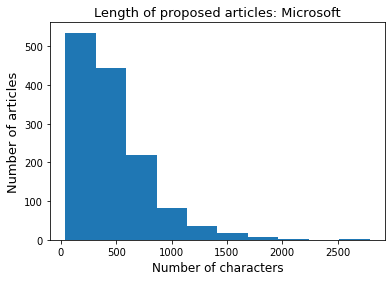

In [51]:
length = []
for article in mic_stock.News:
    try:
        length.append(len(article))
    except:
        pass


plt.hist(length)
plt.title("Length of proposed articles: Microsoft",fontsize=13)
plt.xlabel("Number of characters",fontsize=12)
plt.ylabel("Number of articles",fontsize=13)
plt.show()

## Overall News Article Summary

DJIA

In [52]:
len(news.News)

73608

In [53]:
len(news.News.dropna())

73608

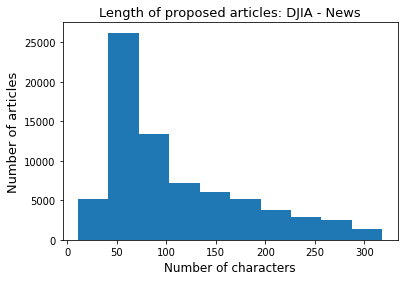

In [54]:
length = []
for article in news.News:
    try:
        length.append(len(article))
    except:
        pass


plt.hist(length)
plt.title("Length of proposed articles: DJIA - News",fontsize=13)
plt.xlabel("Number of characters",fontsize=12)
plt.ylabel("Number of articles",fontsize=13)
plt.show()

Apple

In [55]:
len(apple_stock.News)

2517

In [56]:
len(apple_stock.News.dropna())

2323

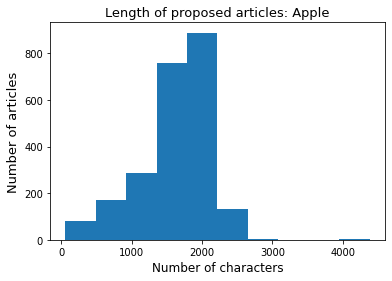

In [57]:
length = []
for article in apple_stock.News:
    try:
        length.append(len(article))
    except:
        pass


plt.hist(length)
plt.title("Length of proposed articles: Apple",fontsize=13)
plt.xlabel("Number of characters",fontsize=12)
plt.ylabel("Number of articles",fontsize=13)
plt.show()

Microsoft

In [58]:
len(mic_stock.News)

2517

In [59]:
len(mic_stock.News.dropna())

1341

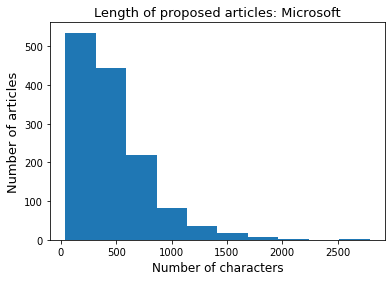

In [60]:
length = []
for article in mic_stock.News:
    try:
        length.append(len(article))
    except:
        pass


plt.hist(length)
plt.title("Length of proposed articles: Microsoft",fontsize=13)
plt.xlabel("Number of characters",fontsize=12)
plt.ylabel("Number of articles",fontsize=13)
plt.show()